In [1]:

import os

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import constants
import helpers
from helpers import natural_keys

weights_path = '/home/brechard/PycharmProjects/modeling/models/Recognizer/20191212_145953_GTSR/checkpoints/'

# analyze(weights_path, n_plots=200, plot=True)


n_rows 5 n_cols 10


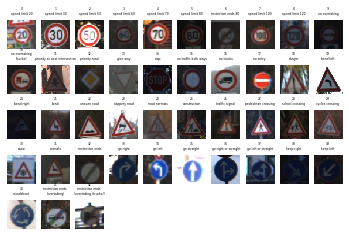

In [2]:
dataset_name = 'GTSR'
classes_path = constants.DATASET_PATH.format(dataset_name) + 'train/'
labels_dict = helpers.get_labels_dict(dataset_name)
n_classes = len(os.listdir(classes_path))
n_rows = 5
n_cols = 10
print('n_rows', n_rows, 'n_cols', n_cols)
n_elems_class = {}

for class_dir in sorted(os.listdir(classes_path), key=natural_keys):
    n_elems_class[class_dir] = len(os.listdir(classes_path + class_dir))
    img_path = classes_path + class_dir + '/' + os.listdir(classes_path + class_dir)[0]
    plt.subplot(n_rows, n_cols, int(class_dir) + 1)
    plt.imshow(cv2.resize(mpimg.imread(img_path), (50, 50)))
    label = labels_dict[class_dir]
    if '(' in label:
        label = label.split('(')
        label[0] += '\n'
        label = '('.join(label)
    plt.title(class_dir + '\n' + label, fontsize=3)
    plt.axis('off')

plt.savefig(constants.PROJECT_PATH + '/reports/figures/GTSR_signs.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()



In [3]:
def plot_df(x, y, dataset):
    def plot_helper(show_labels):
        plt.bar(x, y)
        plt.title("Number of images per class in " + dataset)
        plt.xlabel("Class")
        plt.ylabel("Number of images")
        ticks = x
        if show_labels:
            ticks = [labels_dict[str(real_class)] for real_class in x]

        plt.xticks(list(x), ticks, rotation='vertical')
        name = dataset+ '_class_distribution' + ('_labels' if show_labels else '') +'.png'
        plt.savefig(constants.PROJECT_PATH + '/reports/figures/' + name, 
                    dpi=300, bbox_inches='tight', pad_inches=0.5)
        plt.figure()

    plot_helper(False)
    plot_helper(True)

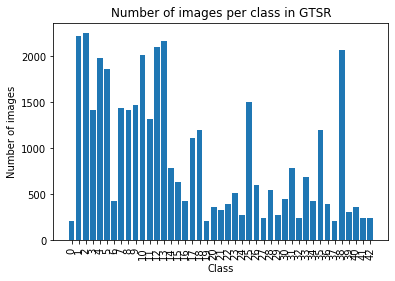

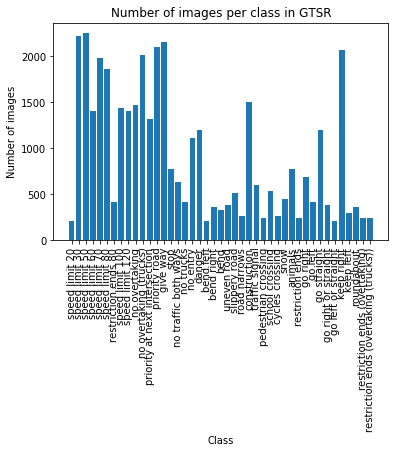

<Figure size 432x288 with 0 Axes>

In [4]:
plot_df(n_elems_class.keys(), n_elems_class.values(), dataset_name)

In [5]:
dataset_name = constants.GTSD
gtsd = pd.read_csv(constants.ANNOTATIONS_CSV_PATH.format(dataset_name, 'train'))

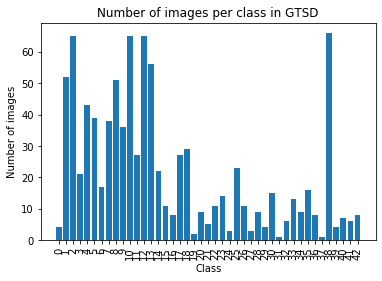

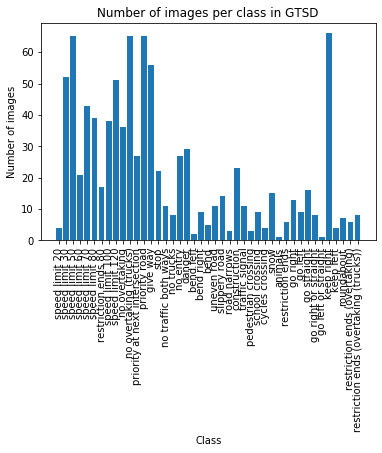

<Figure size 432x288 with 0 Axes>

In [6]:
gtsd_count = gtsd.groupby('label').count()
plot_df(gtsd_count.index, gtsd_count.filename, dataset_name)